In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



In [2]:
Train_data = pd.read_csv("train.csv")
Train_data.head

<bound method NDFrame.head of          ID  Type                                           Sequence
0     D1001   DNA  EPATILLIDDHPMLRTGVKQLISMAPDITVVGEASNGEQGIELAES...
1     D1005   DNA  MKRESHKHAEQARRNRLAVALHELASLIPAEWKQQNVSAAPSKATT...
2     D1008   DNA                      RPYACPVESCDRRFSRSADLTRHIRIHTG
3     D1010   DNA  GPYLVIVEQPKQRGFRFRYGCEGPSHGGLPGASSEKGRKTYPTVKI...
4     D1015   DNA  ALTNAQILAVIDSWEETVGQFPVITHHVPLGGGLQGTLHCYEIPLA...
...     ...   ...                                                ...
3044  N5408  NDNA  MANMLYFSLLALLFMTGIASEGTISSGLASLKAKIDAKRPSGKQLF...
3045  N5410  NDNA  MTFRKSFDCYDFYDRAKVGEKCTQDDWDLMKIPMKAMELKQKYGLD...
3046  N5412  NDNA  MSPYFKLSSALIFLAITMEALCSPIENTSTSNKDNDKETEHIEISA...
3047  N5414  NDNA  MGRICPVNSRARRLRARPGRPSGDSLPYHQLQGGAPRLWSPDPGRP...
3048  N5416  NDNA  MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...

[3049 rows x 3 columns]>

In [3]:
Train_data.loc[Train_data['Type']=='DNA','Type']=1
Train_data.loc[Train_data['Type']=='NDNA','Type']=0
Train_data['Type'] = Train_data['Type'].astype(int, errors = 'raise')
Train_data.head

<bound method NDFrame.head of          ID  Type                                           Sequence
0     D1001     1  EPATILLIDDHPMLRTGVKQLISMAPDITVVGEASNGEQGIELAES...
1     D1005     1  MKRESHKHAEQARRNRLAVALHELASLIPAEWKQQNVSAAPSKATT...
2     D1008     1                      RPYACPVESCDRRFSRSADLTRHIRIHTG
3     D1010     1  GPYLVIVEQPKQRGFRFRYGCEGPSHGGLPGASSEKGRKTYPTVKI...
4     D1015     1  ALTNAQILAVIDSWEETVGQFPVITHHVPLGGGLQGTLHCYEIPLA...
...     ...   ...                                                ...
3044  N5408     0  MANMLYFSLLALLFMTGIASEGTISSGLASLKAKIDAKRPSGKQLF...
3045  N5410     0  MTFRKSFDCYDFYDRAKVGEKCTQDDWDLMKIPMKAMELKQKYGLD...
3046  N5412     0  MSPYFKLSSALIFLAITMEALCSPIENTSTSNKDNDKETEHIEISA...
3047  N5414     0  MGRICPVNSRARRLRARPGRPSGDSLPYHQLQGGAPRLWSPDPGRP...
3048  N5416     0  MYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALRLCAYCCNI...

[3049 rows x 3 columns]>

In [4]:
Train_data = Train_data.drop(["ID"],axis=1)
Train_data

,Type,Sequence
0,1,EPATILLIDDHPMLRTGVKQLISMAPDITVVGEASNGEQGIELAES...
1,1,MKRESHKHAEQARRNRLAVALHELASLIPAEWKQQNVSAAPSKATT...
2,1,RPYACPVESCDRRFSRSADLTRHIRIHTG
3,1,GPYLVIVEQPKQRGFRFRYGCEGPSHGGLPGASSEKGRKTYPTVKI...
4,1,ALTNAQILAVIDSWEETVGQFPVITHHVPLGGGLQGTLHCYEIPLA...
...,...,...
3044,0,MANMLYFSLLALLFMTGIASEGTISSGLASLKAKIDAKRPSGKQLF...
3045,0,MTFRKSFDCYDFYDRAKVGEKCTQDDWDLMKIPMKAMELKQKYGLD...
3046,0,MSPYFKLSSALIFLAITMEALCSPIENTSTSNKDNDKETEHIEISA...
3047,0,MGRICPVNSRARRLRARPGRPSGDSLPYHQLQGGAPRLWSPDPGRP...


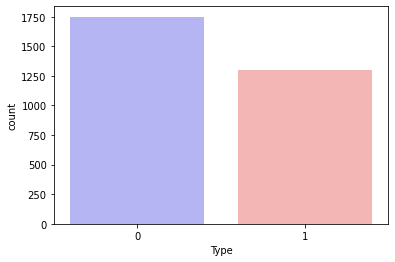

In [5]:
sns.countplot(x="Type", data=Train_data, palette="bwr")
plt.show()

In [6]:
x_train = Train_data["Sequence"]
y_train = Train_data["Type"]

In [7]:
aminoacid_sequence = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
#dipeptide_seq = aminoacid_sequence

In [8]:
def get_amino_acid_dict(str): 
    size = len(str)
    i = 0
    eachseq_list = []
    while( i < size - 1 ):
        add_seq = str[i] 
        eachseq_list.append(add_seq)
        i += 1
    getdict = {}
    
    for item in eachseq_list:
        if getdict.get(item) == None:
            getdict[item] = 1
        else:
            temp = getdict[item]
            temp += 1
            getdict[item] = temp
    
    new_dict = {}
    for item in getdict:
        value = getdict[item]
        value = value/(len(str))
        new_dict[item] = value
    return new_dict

In [9]:
def getlist_of_dictionary(x_train):
    list_dictionary = []
    
    for each in x_train:
        dic = get_amino_acid_dict(each)
        list_dictionary.append(dic)    
    return list_dictionary

In [10]:
def getvector(vector_dictionary):
    final_vector = []
    
    for dic in vector_dictionary:
        vec = [0.0] * 20
        for item in dic:
            for seq in aminoacid_sequence:
                if seq == item:
                    index = aminoacid_sequence.index(seq)
                    vec[index] = dic[item]
                    
        final_vector.append(vec)            
    
    return final_vector

In [11]:
training_vector_dict = getlist_of_dictionary(x_train)
X_Train = getvector(training_vector_dict)

In [12]:
x = np.array(X_Train)
y = np.array(y_train)

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, random_state=42)

In [14]:
x_train

array([[0.06439394, 0.01136364, 0.01893939, ..., 0.0719697 , 0.01515152,
        0.05681818],
       [0.1980198 , 0.02970297, 0.00990099, ..., 0.02970297, 0.01980198,
        0.00990099],
       [0.04906542, 0.04205607, 0.04205607, ..., 0.06074766, 0.00934579,
        0.03037383],
       ...,
       [0.0430839 , 0.01662887, 0.06500378, ..., 0.03628118, 0.00302343,
        0.03703704],
       [0.07023411, 0.01337793, 0.090301  , ..., 0.0367893 , 0.00668896,
        0.00668896],
       [0.07843137, 0.01960784, 0.02941176, ..., 0.10784314, 0.        ,
        0.00980392]])

# Machine Learning Models

In [15]:
svm_model = Pipeline([('clf', SVC())])
param_C = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
param_scoring = ["accuracy"]

param = [{'clf__C': param_C,'clf__kernel': ['linear','rbf']}]
grid = GridSearchCV(estimator=svm_model,param_grid=param,refit = 'accuracy',scoring=param_scoring,verbose = 100,cv=10,n_jobs=-1)
grid = grid.fit(x_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [16]:
SVM_acc = grid.best_score_*100
print(" The Accuracy of the SVM is :{:.2f}%".format(SVM_acc))
print(" Best Parameters : ",grid.best_params_)

 The Accuracy of the SVM is :73.10%
 Best Parameters :  {'clf__C': 1.0, 'clf__kernel': 'rbf'}


In [17]:
classifier = grid.best_estimator_
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_val)

In [18]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [19]:
params_KNN = {'n_neighbors': [1,2,3,4], 'p': [1]}

In [20]:
KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=100,  
                      scoring='accuracy', 
                      return_train_score=True)

In [21]:
KNN.fit(x_train, y_train)

Fitting 15 folds for each of 4 candidates, totalling 60 fits
[CV 1/15; 1/4] START n_neighbors=1, p=1.........................................
[CV 1/15; 1/4] END n_neighbors=1, p=1;, score=(train=1.000, test=0.670) total time=   0.0s
[CV 2/15; 1/4] START n_neighbors=1, p=1.........................................
[CV 2/15; 1/4] END n_neighbors=1, p=1;, score=(train=1.000, test=0.664) total time=   0.0s
[CV 3/15; 1/4] START n_neighbors=1, p=1.........................................
[CV 3/15; 1/4] END n_neighbors=1, p=1;, score=(train=1.000, test=0.668) total time=   0.0s
[CV 4/15; 1/4] START n_neighbors=1, p=1.........................................
[CV 4/15; 1/4] END n_neighbors=1, p=1;, score=(train=1.000, test=0.641) total time=   0.0s
[CV 5/15; 1/4] START n_neighbors=1, p=1.........................................
[CV 5/15; 1/4] END n_neighbors=1, p=1;, score=(train=1.000, test=0.669) total time=   0.0s
[CV 6/15; 1/4] START n_neighbors=1, p=1........................................

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4], 'p': [1]},
             return_train_score=True, scoring='accuracy', verbose=100)

In [22]:
KNN.best_params_

{'n_neighbors': 4, 'p': 1}

In [23]:
KNN_acc = KNN.best_score_*100
print("Accuracy of KNN is: {:.2f}%".format(KNN_acc))

Accuracy of KNN is: 68.12%


In [24]:
accuracy_score(y_val,KNN.predict(x_val))

0.6557377049180327

In [25]:
clf_rfi = RandomForestClassifier(n_estimators=531,random_state=17)

In [26]:
clf_rfi.fit(x_train,y_train)

RandomForestClassifier(n_estimators=531, random_state=17)

In [27]:
accuracy_score(y_train,clf_rfi.predict(x_train))

1.0

In [28]:
RF_acc = accuracy_score(y_val,clf_rfi.predict(x_val))*100
print("Accuracy of Random Forest is: {:.2f}%".format(RF_acc))

Accuracy of Random Forest is: 69.84%


c:\Users\shaik\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy %'>

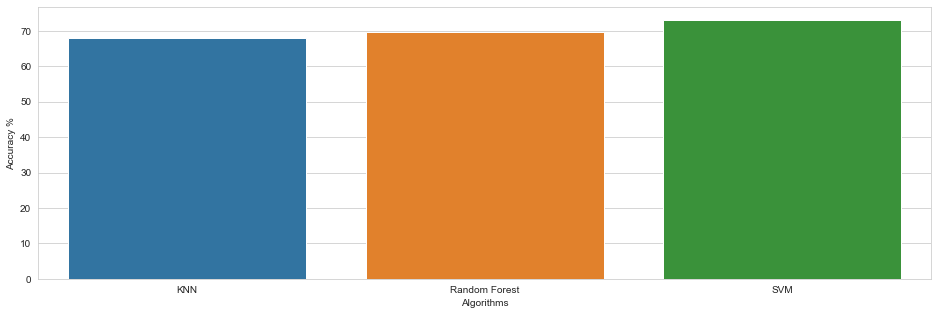

In [29]:
algorithms=['KNN','Random Forest','SVM']
scores=[KNN_acc,RF_acc,SVM_acc]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(algorithms,scores)

# Connecting to Uniprot

In [30]:
import requests, sys

WEBSITE_API = "https://rest.uniprot.org"

# Helper function to download data
def get_url(url, **kwargs):
  response = requests.get(url, **kwargs);

  if not response.ok:
    print(response.text)
    response.raise_for_status()
    sys.exit()

  return response

In [32]:
ID =input("Give your uniproot ID")
r = get_url(f"{WEBSITE_API}/uniprotkb/accessions?accessions={ID}&format=fasta")
fasta = r.text
sequence = open("sequence.fasta",'w')
sequence.write(fasta)
sequence.close()
from Bio import SeqIO

File_Name ="sequence.fasta"
Seq_object = SeqIO.read(File_Name,"fasta")
sequence = Seq_object.seq
sequence = sequence.upper()


In [33]:
header = ['ID', 'Sequence']
data = [ID, sequence]
with open('test.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [34]:
id = []
test_sequence = []
test = "test.csv"
with open(test) as f:
    for line in f:
        after_split = line.split(",")
        if after_split[0] == 'ID':
            continue
        id.append(after_split[0])
        test_sequence.append(after_split[1][:-1])

In [35]:
testing_vector_dict = getlist_of_dictionary(test_sequence)
x_test = getvector(testing_vector_dict)
x_test = np.array(x_test)
x_test.shape

(1, 20)

In [36]:
ans_SVM = classifier.predict(x_test)
print(ans_SVM)
if ans_SVM == 1:
    print("Yes it is a DNA Binding Protein")
    str1 = f"{WEBSITE_API}/uniprotkb/search?query="
    str2 = ID
    str3 = "&includeIsoform=true&fields=accession,cc_function,cc_subcellular_location,cc_ptm,sequence&format=tsv"
    str = str1 + str2 + str3 
    r = get_url(str)
    print("The functions of the given sequence are \n",r.text)
else:
    print("No it is not a DNA Binding Protein")

[1]
Yes it is a DNA Binding Protein
The functions of the given sequence are 
 Entry	Function [CC]	Subcellular location [CC]	Post-translational modification	Sequence
P0ACF8	FUNCTION: A DNA-binding protein implicated in transcriptional repression (silencing) (PubMed:333393, PubMed:2128918, PubMed:8890170, PubMed:8913298, PubMed:9398522, PubMed:16963779, PubMed:17046956, PubMed:23543115). Also involved in bacterial chromosome organization and compaction (PubMed:6379600, PubMed:10982869, PubMed:21903814). H-NS binds tightly to AT-rich dsDNA and inhibits transcription (PubMed:2512122, PubMed:16963779, PubMed:17435766, PubMed:17881364, PubMed:23543115). Binds upstream and downstream of initiating RNA polymerase, trapping it in a loop and preventing transcription (PubMed:11714691). Binds to hundreds of sites, approximately half its binding sites are in non-coding DNA, which only accounts for about 10% of the genome (PubMed:16963779, PubMed:17046956, PubMed:23543115). Many of these loci were h